In [40]:
cd /content/drive/My Drive/deep_learning_exercise/Convolution_in_Tensorflow/cats_and_dogs_Kaggle

/content/drive/My Drive/deep_learning_exercise/Convolution_in_Tensorflow/cats_and_dogs_Kaggle


# SET UP

In [41]:
import tensorflow as tf 
from tensorflow import keras
import numpy as np
import os 
import matplotlib.pyplot as plt


# LOAD DATA

In [ ]:
!wget --no-check-certificate \
  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
  -O ./cats_and_dogs_filtered.zip

shell-init: error retrieving current directory: getcwd: cannot access parent directories: No such file or directory
./cats_and_dogs_filtered.zip: No such file or directory


In [ ]:
main_folder = './'
!unzip -q cats_and_dogs_filtered.zip -d $main_folder

In [42]:
cd cats_and_dogs_filtered/

/content/drive/My Drive/deep_learning_exercise/Convolution_in_Tensorflow/cats_and_dogs_Kaggle/cats_and_dogs_filtered


In [43]:
train_dir = "./train"
validation_dir = "./validation"

train_cats_dir = "./train/cats/"
train_dogs_dir = "./train/dogs/"
valid_cats_dir = "./validation/cats/"
valid_dogs_dir = "./validation/dogs/"

In [44]:
train_dogs_fnames = os.listdir(train_dogs_dir)
train_cats_fnames = os.listdir(train_cats_dir)

print(train_cats_fnames[:10])
print(train_dogs_fnames[:10])

['cat.585.jpg', 'cat.588.jpg', 'cat.589.jpg', 'cat.587.jpg', 'cat.584.jpg', 'cat.594.jpg', 'cat.593.jpg', 'cat.591.jpg', 'cat.590.jpg', 'cat.592.jpg']
['dog.583.jpg', 'dog.584.jpg', 'dog.586.jpg', 'dog.592.jpg', 'dog.593.jpg', 'dog.590.jpg', 'dog.59.jpg', 'dog.591.jpg', 'dog.588.jpg', 'dog.589.jpg']


In [45]:
print("total training dogs images",len(os.listdir(train_dogs_dir)))
print("total training cats images",len(os.listdir(train_dogs_dir)))
print("total validation dogs images",len(os.listdir(valid_dogs_dir)))
print("total validation dogs images",len(os.listdir(valid_dogs_dir)))

total training dogs images 1000
total training cats images 1000
total validation dogs images 500
total validation dogs images 500


# Take somes pictures of data 

In [46]:
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# Parameters for our graph; we 'll ouput images 4x4 configuration
nrows = 4
ncols = 4 

pic_index = 0 # Index for iterating over images

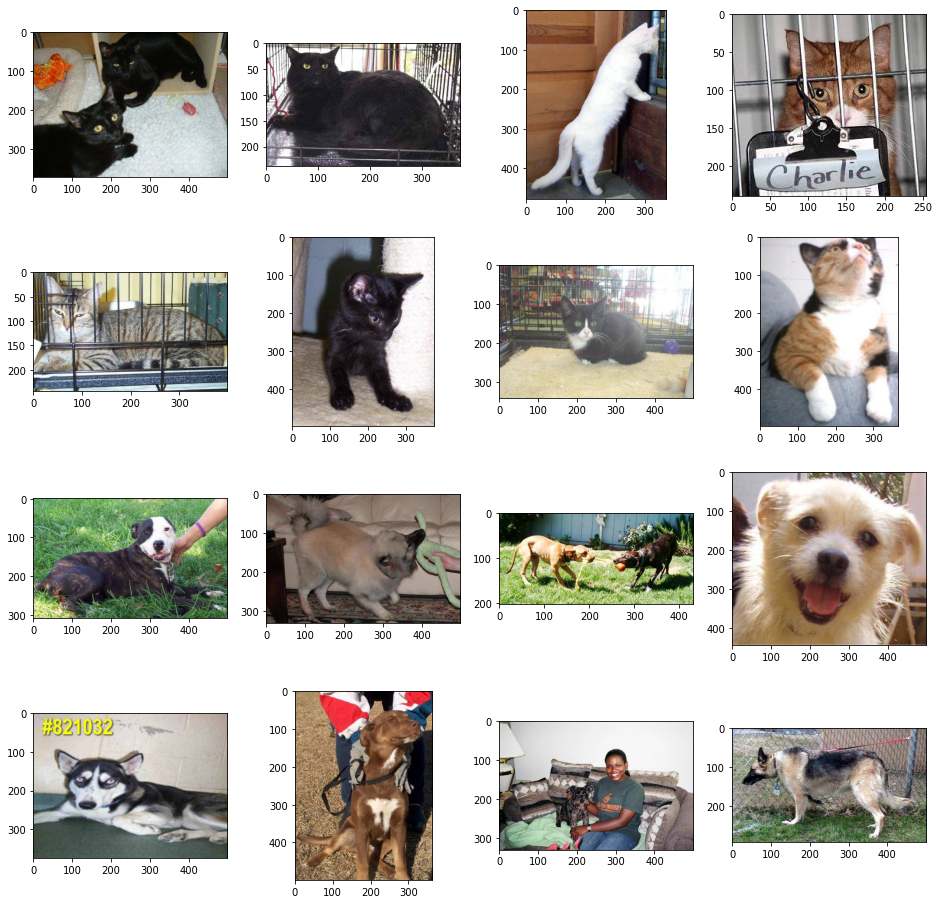

In [47]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

pic_index+=8

next_cat_pix = [os.path.join(train_cats_dir, fname) 
                for fname in train_cats_fnames[ pic_index-8:pic_index] 
               ]

next_dog_pix = [os.path.join(train_dogs_dir, fname) 
                for fname in train_dogs_fnames[ pic_index-8:pic_index]
               ]

for i, img_path in enumerate(next_cat_pix+next_dog_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
   #sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

# BUILDING and COMPLILE  the model 

In [48]:
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(32 , (3,3) , activation="relu" ,input_shape=(150,150,3)),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    tf.keras.layers.Conv2D(64 , (3,3) , activation="relu" ),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    tf.keras.layers.Conv2D(128 , (3,3) , activation="relu" ),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    tf.keras.layers.Conv2D(128 , (3,3) , activation="relu" ),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512,activation="relu"),
                                    tf.keras.layers.Dense(1,activation="sigmoid")                                 
                                    ])

In [49]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 15, 15, 128)      

In [50]:
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(lr=0.001), 
                        loss = "binary_crossentropy",
                        metrics = ["accuracy"])

# Data preprocessing

In [51]:
# normalization
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255.0)
valid_datagen = ImageDataGenerator(rescale = 1./255.0)
# flow data from directory 
# 2000 training images , 1000 validation images

train_generator = train_datagen.flow_from_directory(train_dir,
                                class_mode = "binary",
                                target_size = (150,150),
                                batch_size = 20)


valid_generator = valid_datagen.flow_from_directory(validation_dir,
                                class_mode = "binary",
                                target_size = (150,150),
                                batch_size = 10)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


# TRAINING DATA

In [59]:

DESIRED_ACCURACY = 0.9

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>DESIRED_ACCURACY):
      print("\nReached 90% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()

In [53]:
history = model.fit(train_generator,
                    validation_data = valid_generator,
                    epochs = 20,
                    verbose = 1,
                    callbacks = [callbacks]
                    )

Epoch 1/20
100/100 [==============================] - 14s 144ms/step - loss: 0.8047 - accuracy: 0.5075 - val_loss: 0.6904 - val_accuracy: 0.5620
Epoch 2/20
100/100 [==============================] - 14s 141ms/step - loss: 0.7034 - accuracy: 0.5605 - val_loss: 0.6737 - val_accuracy: 0.6200
Epoch 3/20
100/100 [==============================] - 14s 144ms/step - loss: 0.6629 - accuracy: 0.6410 - val_loss: 0.5884 - val_accuracy: 0.6750
Epoch 4/20
100/100 [==============================] - 14s 142ms/step - loss: 0.6079 - accuracy: 0.6840 - val_loss: 0.6245 - val_accuracy: 0.6550
Epoch 5/20
100/100 [==============================] - 14s 142ms/step - loss: 0.5387 - accuracy: 0.7295 - val_loss: 0.5737 - val_accuracy: 0.7190
Epoch 6/20
100/100 [==============================] - 14s 142ms/step - loss: 0.4859 - accuracy: 0.7745 - val_loss: 0.5807 - val_accuracy: 0.7170
Epoch 7/20
100/100 [==============================] - 14s 143ms/step - loss: 0.4407 - accuracy: 0.7790 - val_loss: 0.5639 - val_ac

# NOTE

* When your model receive the accuracy of loss function which don't change during the training, we need to change learning rate or adjust the model.  

* we can see add some Convolutions or Maxpooling or increase the number of filters of Conv2D , may be lead to overfiting (in this case accuracy = 91% , loss_accuracy =  70% ) after 11 epochs 

### Evaluating Accuracy and Loss for the Model

Let's plot the training/validation accuracy and loss as collected during training:

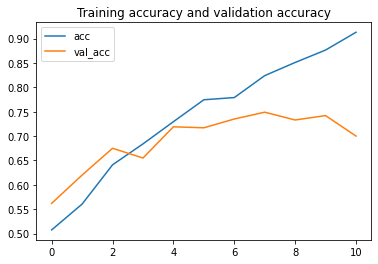

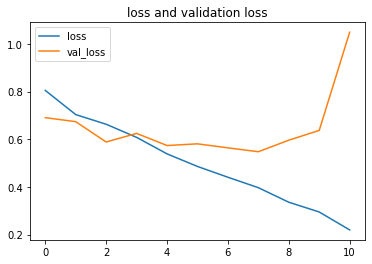

In [54]:
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(len(acc))

plt.plot(epochs , acc ,label = "acc")
plt.plot(epochs, val_acc , label = "val_acc")
plt.title("Training accuracy and validation accuracy")
plt.legend()
plt.figure()

plt.plot(epochs , loss, label = "loss")
plt.plot(epochs, val_loss, label = "val_loss")
plt.title("loss and validation loss")
plt.legend()


This is a great example of overfitting -- which in short means that it can do very well with images it has seen before, but not so well with images it hasn't. Let's see if we can do better to avoid overfitting -- and one simple method is to augment the images a bit. If you think about it, most pictures of a cat are very similar -- the ears are at the top, then the eyes, then the mouth etc. Things like the distance between the eyes and ears will always be quite similar too.

What if we tweak with the images to change this up a bit -- rotate the image, squash it, etc. That's what image augementation is all about. And there's an API that makes it easy...

Take a look at ImageGenerator. There are properties on it that you can see to augment the image: 

In [58]:
# RETRAIN MODEL 

####**Augumentation data** 

These are a few of options available for each property : 

* rotation_range is a value in degrees (0–180), a range within which to randomly rotate pictures.
* width_shift and height_shift are ranges (as a fraction of total width or height) within which to randomly translate pictures vertically or horizontally.
* shear_range is for randomly applying shearing transformations.
* zoom_range is for randomly zooming inside pictures.
* horizontal_flip is for randomly flipping half of the images horizontally. This is relevant when there are no assumptions of horizontal assymmetry (e.g. real-world pictures).
* fill_mode is the strategy used for filling in newly created pixels, which can appear after a rotation or a width/height shift.


In [56]:
valid_datagen = ImageDataGenerator(rescale=1./255.0)

train_datagen = ImageDataGenerator(
      rescale = 1./255.0,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(train_dir,
                                class_mode = "binary",
                                target_size = (150,150),
                                batch_size = 20)


valid_generator = valid_datagen.flow_from_directory(validation_dir,
                                class_mode = "binary",
                                target_size = (150,150),
                                batch_size = 10)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [62]:
history = model.fit(train_generator,
                    validation_data = valid_generator,
                    epochs = 20,
                    verbose = 1,
                    callbacks = [callbacks]
                    )

Epoch 1/20
100/100 [==============================] - 25s 246ms/step - loss: 0.5811 - accuracy: 0.6940 - val_loss: 0.5751 - val_accuracy: 0.7010
Epoch 2/20
100/100 [==============================] - 24s 244ms/step - loss: 0.5671 - accuracy: 0.7130 - val_loss: 0.5496 - val_accuracy: 0.7230
Epoch 3/20
100/100 [==============================] - 24s 244ms/step - loss: 0.5682 - accuracy: 0.7095 - val_loss: 0.4862 - val_accuracy: 0.7630
Epoch 4/20
100/100 [==============================] - 25s 251ms/step - loss: 0.5709 - accuracy: 0.7125 - val_loss: 0.5152 - val_accuracy: 0.7620
Epoch 5/20
100/100 [==============================] - 24s 244ms/step - loss: 0.5471 - accuracy: 0.7215 - val_loss: 0.4808 - val_accuracy: 0.7770
Epoch 6/20
100/100 [==============================] - 24s 242ms/step - loss: 0.5529 - accuracy: 0.7320 - val_loss: 0.4563 - val_accuracy: 0.7870
Epoch 7/20
100/100 [==============================] - 25s 248ms/step - loss: 0.5468 - accuracy: 0.7280 - val_loss: 0.4629 - val_ac

### Evaluating Accuracy and Loss for the Model

Let's plot the training/validation accuracy and loss as collected during training:

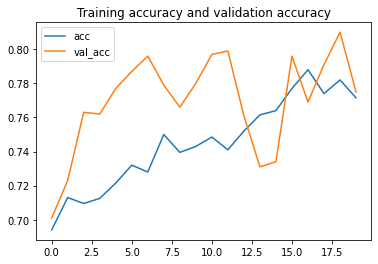

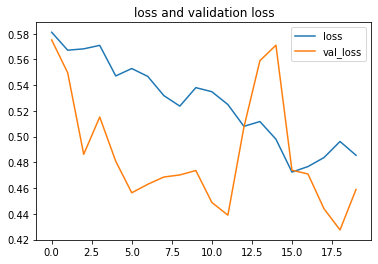

In [63]:
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(len(acc))

plt.plot(epochs , acc ,label = "acc")
plt.plot(epochs, val_acc , label = "val_acc")
plt.title("Training accuracy and validation accuracy")
plt.legend()
plt.figure()

plt.plot(epochs , loss, label = "loss")
plt.plot(epochs, val_loss, label = "val_loss")
plt.title("loss and validation loss")
plt.legend()


#### NOTE

We can see accuracy and the val_accuracy have the quite same value after 20 epochs, the overfiting is handled , We need to adjust the model to improve the quality of model. 

# PREDICT 

In [69]:
import numpy as np

from google.colab import files
from keras.preprocessing import image

uploaded=files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path='./' + fn
  img=image.load_img(path, target_size=(150, 150))
  
  x=image.img_to_array(img)
  x=np.expand_dims(x, axis=0)
  images = np.vstack([x])
  
  classes = model.predict(images, batch_size=10)
  
  print(classes[0])
  
  if classes[0]>0:
    print(fn + " is a dog")
    
  else:
    print(fn + " is a cat")

Saving cat2.jpeg to cat2.jpeg
[0.]
cat2.jpeg is a cat
